In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### importing dataset

In [300]:
dataset = pd.read_csv('insurance.csv')

In [301]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### exploring the dataset

In [302]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [303]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

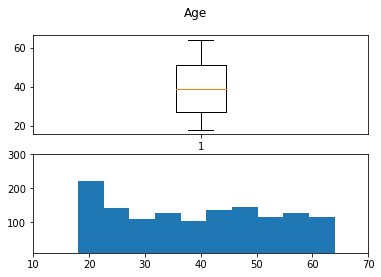

In [304]:
figure, axis = plt.subplots(2, 1)
figure.suptitle('Age')
plt.xlim([10,70])
plt.ylim([10,300])
axis[0].boxplot(dataset['age'])
axis[1].hist(dataset['age'])
plt.show()

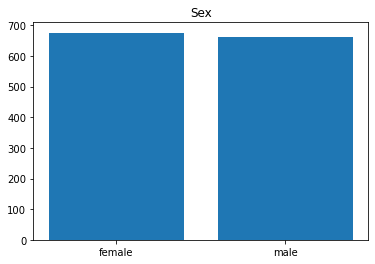

In [305]:
plt.title('Sex')
plt.bar(dataset['sex'].unique(),dataset['sex'].value_counts())
plt.show()

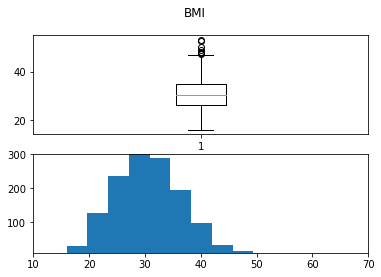

In [306]:
figure, axis = plt.subplots(2, 1)
figure.suptitle('BMI')
plt.xlim([10,70])
plt.ylim([10,300])
axis[0].boxplot(dataset['bmi'])
axis[1].hist(dataset['bmi'])
plt.show()

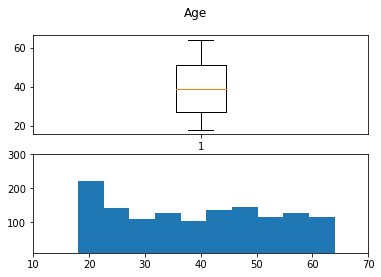

In [307]:
figure, axis = plt.subplots(2, 1)
figure.suptitle('Age')
plt.xlim([10,70])
plt.ylim([10,300])
axis[0].boxplot(dataset['age'])
axis[1].hist(dataset['age'])
plt.show()

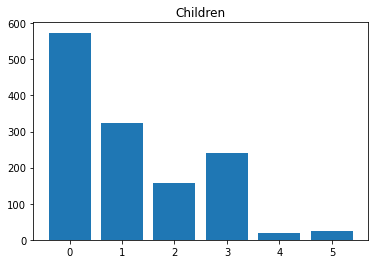

In [308]:
plt.title('Children')
plt.bar(dataset['children'].unique(),dataset['children'].value_counts())
plt.show()

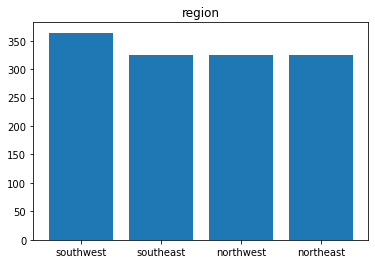

In [309]:
plt.title('region')
plt.bar(dataset['region'].unique(),dataset['region'].value_counts())
plt.show()

### DEPENDENT X INDEPENDENT VARIABLE

In [310]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

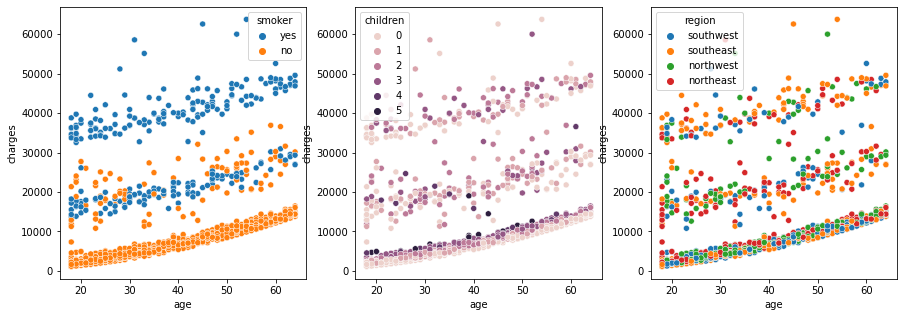

In [311]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=dataset, x='age', y='charges', hue='smoker',ax=axes[0])
sns.scatterplot(data=dataset, x='age', y='charges', hue='children',ax=axes[1])
sns.scatterplot(data=dataset, x='age', y='charges', hue='region',ax=axes[2])
plt.show()


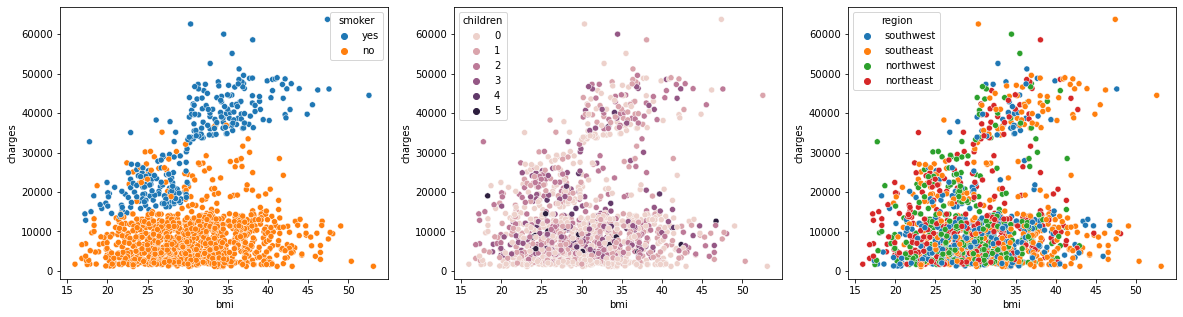

In [312]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.scatterplot(data=dataset, x='bmi', y='charges', hue='smoker',ax=axes[0])
sns.scatterplot(data=dataset, x='bmi', y='charges', hue='children',ax=axes[1])
sns.scatterplot(data=dataset, x='bmi', y='charges', hue='region',ax=axes[2])
plt.show()

### DATA PREPROCESSING

In [313]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [314]:
#Encoding smoker column
smoker = dataset['smoker'].values
print(smoker)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
smoker = le.fit_transform(smoker)
smoker = np.reshape(smoker,(-1,1))
print(f'Label Encoder {smoker}')

['yes' 'no' 'no' ... 'no' 'no' 'yes']
Label Encoder [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [315]:
#Encoding Sex Column
sex = dataset['sex'].values
print(sex)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sex = le.fit_transform(sex)
sex = np.reshape(sex,(-1,1))
print(f'Label Encoder {sex}')

['female' 'male' 'male' ... 'female' 'female' 'female']
Label Encoder [[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [316]:
region = dataset['region'].values
region = np.reshape(region,(-1,1))
print(region)

[['southwest']
 ['southeast']
 ['southeast']
 ...
 ['southeast']
 ['southwest']
 ['northwest']]


In [317]:
X  = dataset[['age','bmi','children']].values
print(X)

[[19.   27.9   0.  ]
 [18.   33.77  1.  ]
 [28.   33.    3.  ]
 ...
 [18.   36.85  0.  ]
 [21.   25.8   0.  ]
 [61.   29.07  0.  ]]


In [318]:
X = np.concatenate((region,X,smoker,sex), axis = 1)
print(X)

[['southwest' 19.0 27.9 0.0 1 0]
 ['southeast' 18.0 33.77 1.0 0 1]
 ['southeast' 28.0 33.0 3.0 0 1]
 ...
 ['southeast' 18.0 36.85 0.0 0 0]
 ['southwest' 21.0 25.8 0.0 0 0]
 ['northwest' 61.0 29.07 0.0 1 0]]


In [319]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0:10])

[[0.0 0.0 0.0 1.0 19.0 27.9 0.0 1 0]
 [0.0 0.0 1.0 0.0 18.0 33.77 1.0 0 1]
 [0.0 0.0 1.0 0.0 28.0 33.0 3.0 0 1]
 [0.0 1.0 0.0 0.0 33.0 22.705 0.0 0 1]
 [0.0 1.0 0.0 0.0 32.0 28.88 0.0 0 1]
 [0.0 0.0 1.0 0.0 31.0 25.74 0.0 0 0]
 [0.0 0.0 1.0 0.0 46.0 33.44 1.0 0 0]
 [0.0 1.0 0.0 0.0 37.0 27.74 3.0 0 0]
 [1.0 0.0 0.0 0.0 37.0 29.83 2.0 0 1]
 [0.0 1.0 0.0 0.0 60.0 25.84 0.0 0 0]]


In [320]:
y = dataset['charges'].values
y = y.reshape((-1,1))
print(y)

[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state = 123)
print(X_train)


[[0.0 1.0 0.0 ... 1.0 0 1]
 [0.0 0.0 1.0 ... 0.0 1 0]
 [0.0 0.0 0.0 ... 0.0 0 1]
 ...
 [0.0 0.0 0.0 ... 1.0 0 0]
 [1.0 0.0 0.0 ... 0.0 0 1]
 [0.0 1.0 0.0 ... 3.0 1 0]]


In [322]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)
print(y_train)

[[-0.55935984  1.72132593 -0.62129732 ... -0.06736631 -0.5
   0.98884723]
 [-0.55935984 -0.5809475   1.60953535 ... -0.8864794   2.
  -1.01127855]
 [-0.55935984 -0.5809475  -0.62129732 ... -0.8864794  -0.5
   0.98884723]
 ...
 [-0.55935984 -0.5809475  -0.62129732 ... -0.06736631 -0.5
  -1.01127855]
 [ 1.78775793 -0.5809475  -0.62129732 ... -0.8864794  -0.5
   0.98884723]
 [-0.55935984  1.72132593 -0.62129732 ...  1.57085987  2.
  -1.01127855]]
[[-0.56485764]
 [ 2.26194272]
 [-0.39414333]
 ...
 [-0.90193897]
 [-0.95400804]
 [ 2.78049312]]


## Models

In [323]:
model_score = {}
 

### LINEAR REGRESSION

In [324]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_test,y_test))
model_score['Linear Regression'] = reg.score(X_test,y_test)

0.8001744488359045


### Suport Vector Reression

In [325]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train, y_train)
print(reg.score(X_test,y_test))
model_score['SVR'] = reg.score(X_test,y_test)

0.892587418896488


c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decsision Tree Regression

In [326]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
print(reg.score(X_test,y_test))
model_score['Decision Tree Regression'] = reg.score(X_test,y_test)

0.7086043121864416


### Random Forest Regression

In [327]:
scores_random_forest = {}

In [328]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20): 
    reg = RandomForestRegressor(n_estimators=i)
    reg.fit(X_train, y_train)
    scores_random_forest[i] = reg.score(X_test,y_test)
print(scores_random_forest)


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6092\2376065503.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6092\2376065503.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6092\2376065503.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6092\2376065503.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_tra

{1: 0.746648990884647, 2: 0.8535451001499688, 3: 0.841522605783209, 4: 0.8424093414029054, 5: 0.8620542067298054, 6: 0.8835896873842332, 7: 0.8569547303925098, 8: 0.87487471674256, 9: 0.8854208761266071, 10: 0.8680890041319709, 11: 0.8785849440042129, 12: 0.8767699271729481, 13: 0.8823028756432884, 14: 0.8908829513701427, 15: 0.8758219685796782, 16: 0.8799293369427437, 17: 0.8837321979266024, 18: 0.8796871399471393, 19: 0.8740997513898756}


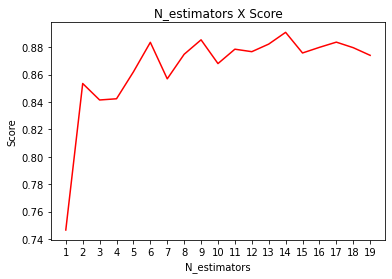

In [329]:
import matplotlib.pyplot as plt
plt.title('N_estimators X Score')
plt.xlabel('N_estimators')
plt.ylabel('Score')
plt.xticks(np.arange(20),np.arange(20))
plt.plot(scores_random_forest.keys(),scores_random_forest.values(),color='red')

In [330]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=14)
reg.fit(X_train, y_train)
scores_random_forest[i] = reg.score(X_test,y_test)
model_score['Random Forest Regression'] = reg.score(X_test,y_test)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6092\3474520004.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


In [331]:
print(model_score)

{'Linear Regression': 0.8001744488359045, 'SVR': 0.892587418896488, 'Decision Tree Regression': 0.7086043121864416, 'Random Forest Regression': 0.8791584317452763}
